# Analyzing Customer Behavior for E-commerce Insights.

## Business Understanding 

E-commerce businesses generate massive amounts of event data from customer sessions, product views, and purchases. Leveraging this data is critical for improving sales, strengthening engagement, and delivering personalized shopping experiences.
Npontu Technologies collects large volumes of e-commerce event data,however the company currently lacks a structured way to translate this raw data into meaningful insights.The business wants to raise revenue, improve engagement, and tailor offers.


### Problem Statement

The company lacks clear signals to find at-risk customers, high-value buyers, and product opportunities. This gap limits the company’s ability to raise revenue, improve customer engagement, and deliver personalized experiences that keep customers coming back.


### Business Objectives 
- Increase repeat purchase rate by identifying and re-engaging at-risk customers.

- Grow average order value by targeting high-potential buyers with offers.

- Improve conversion rate by optimizing product funnels and merchandising.

- Personalize marketing to reduce churn and raise lifetime value (LTV).

- Demonstrate a scalable pipeline (streaming or batch) to compute features in near real-time.


### Goal
By leveraging on the CRISP-DM framework I will transform raw event logs into customer profiles, predictive models, and interactive dashboards. Npontu Technologies can gain actionable insights that drive revenue growth, enhance customer loyalty, and support data-driven decision-making.



### Stakeholders

- Product Manager — decides promotions, product placements, UX changes.

- Growth/Marketing Team — runs campaigns and needs segments and uplift targets.

- Customer Success Team — acts on churn predictions and win-back flows.

- Data Engineering Team — builds ingestion and feature pipelines (Kafka, Spark).

- Data Science Team — builds models and explains them.

- Business Leadership — reviews ROI, revenue impact, and prioritizes initiatives.



### Key Features

The dataset contains the following key files:

1. customers.csv

- Contains customer-level information. Fields include customer_id, age, gender, location and signup_date

2. sessions.csv

- Captures details about customer browsing sessions. This includes session_id, customer_id, session_date, product_viewed, browsing_time_sec,purchase_made and purchase_amount.This helps track how customers interact with the platform over time.




### Key Features of the E-Commerce Insights

- Churn risk list with confidence scores and top drivers per customer.

- Customer segments (new, loyal, at-risk, high LTV) and recommended actions.

- Product funnel metrics: view → add to cart → purchase conversion by product.

- Time trends and seasonality: weekly/monthly demand peaks and campaign lift.

- Top revenue cohorts and product pairs for cross-sell suggestions.

- Dashboard for monitoring model performance and business KPIs.




### Key features to engineer (data features to create)

- RFM: recency (days since last purchase), frequency (# purchases), monetary (total spend).

- Session features: avg session duration, pages viewed, product views per session.

- Recency buckets and days_since_last_purchase (for churn label).

- Behavioral rates: add-to-cart rate, purchase_rate = purchases / sessions.

- Product interaction features: top categories viewed, favorite category, cross-view counts.

- Temporal features: day_of_week, month, days_since_signup, season flags.

- Derived financials: avg_order_value, CLTV proxy (sum of orders over period), discount usage.




### Hypothesis

Customers with long recency (no recent purchase) and low session frequency are more likely to churn.



### 5 Business Questions
1. What is the total number of customers and purchases?
2. Which products are purchased the most?
3. What is the trend of purchases over time (by month)?
4. Which day of the week has the highest conversion rate?
5. Who are the top 10 customers by total spend?
6. What are the top 5 locations by total sales?



### Data Understanding & Preparation
Importing all the relevant libraries

In [1]:
# Core Python Utilities & Configurations

import os
import warnings
import logging
 
warnings.filterwarnings("ignore")
 
# Data Handling and Manipulation
import pandas as pd
import numpy as np
import scipy

# Big Data Processing
from kafka import KafkaConsumer, KafkaProducer  # or just import kafka if using differently
from pyspark.sql import SparkSession

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Feature Engineering & Preprocessing

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
 

# Anomaly Detection & Clustering

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
 

# Model Evaluation & Hyperparameter Tuning

from sklearn.metrics import accuracy_score, classification_report, ndcg_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
 

# Performance & Progress Tracking

from tqdm import tqdm  
 

# Statistical and Scientific Computing
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

# Machine Learning & Recommendation Systems
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # example ML model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# Geographic Data & Mapping
import geopandas as gpd

# Dashboarding for Final Reporting
import dash
from dash import dcc, html

import dash_bootstrap_components as dbc


# Initialization & Status Confirmation

print("✅ Project initialized successfully! All necessary libraries are loaded.")




✅ Project initialized successfully! All necessary libraries are loaded.


### Load all datasets from their sources

In [2]:

# Path of customer csv file
file_path = '../Analyzing-Customer-Behavior-for-E-commerce-Insights/Data/customers.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_customers = pd.read_csv(file_path)
       
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")
 
# Display the DataFrame
df_customers.head()


File exists at the specified path.


,customer_id,age,gender,location,signup_date
0,CUST00001,56,Female,Ghana,2020-11-29
1,CUST00002,69,Male,India,2022-11-09
2,CUST00003,46,Female,NaN,2020-07-23
3,CUST00004,32,Male,India,2022-08-13
4,CUST00005,60,Female,Brazil,2020-12-20


In [3]:
# Path of session csv file
file_path = '../Analyzing-Customer-Behavior-for-E-commerce-Insights/Data/sessions.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_sessions = pd.read_csv(file_path)
       
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")
 
# Display the DataFrame
df_sessions.head()


File exists at the specified path.


,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_amount
0,SESS000001,CUST04899,2021-06-16,Laptop,743,0,0.0
1,SESS000002,CUST00246,2022-09-23,Laptop,247,0,0.0
2,SESS000003,CUST04945,2023-03-08,Laptop,201,0,0.0
3,SESS000004,CUST03372,2021-08-24,Phone,93,0,0.0
4,SESS000005,CUST01351,2023-07-11,Book,330,0,0.0


#### Concatenating the two data sets to form one. 
We will do a left join using the customer id which is common to both data sets. df_final is the combined data set of customers and sessions data

In [4]:
df_combine = df_sessions.merge(df_customers, how='left', on='customer_id', suffixes=('_df_sessions','_df_customers'))



## Exploratory Data Analysis(EDA)

In [5]:
df_combine.head()

,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_amount,age,gender,location,signup_date
0,SESS000001,CUST04899,2021-06-16,Laptop,743,0,0.0,31.0,Female,US,2020-04-25
1,SESS000002,CUST00246,2022-09-23,Laptop,247,0,0.0,34.0,Female,Brazil,2021-01-26
2,SESS000003,CUST04945,2023-03-08,Laptop,201,0,0.0,64.0,Male,India,2021-03-01
3,SESS000004,CUST03372,2021-08-24,Phone,93,0,0.0,52.0,Female,India,2022-01-28
4,SESS000005,CUST01351,2023-07-11,Book,330,0,0.0,57.0,Female,US,2021-04-06


In [6]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50100 entries, 0 to 50099
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_id         50100 non-null  object 
 1   customer_id        49900 non-null  object 
 2   session_date       50100 non-null  object 
 3   product_viewed     49099 non-null  object 
 4   browsing_time_sec  50100 non-null  int64  
 5   purchase_made      50100 non-null  int64  
 6   purchase_amount    50100 non-null  float64
 7   age                49900 non-null  float64
 8   gender             48983 non-null  object 
 9   location           47542 non-null  object 
 10  signup_date        49900 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.2+ MB


In [7]:
#Summary Statistics
df_combine.describe()

,browsing_time_sec,purchase_made,purchase_amount,age
count,50100.000000,50100.000000,50100.000000,49900.000000
mean,300.831776,0.299521,300.315221,43.484549
std,298.183835,0.458053,557.318938,14.930561
min,0.000000,0.000000,0.000000,18.000000
25%,87.000000,0.000000,0.000000,31.000000
50%,210.000000,0.000000,0.000000,43.000000
75%,418.000000,1.000000,338.687500,56.000000
max,3316.000000,1.000000,1999.740000,69.000000


In [8]:
# Get the list of all column names in the DataFrame
columns = df_combine.columns
 
# Print details of unique values for each column in the DataFrame
for column in columns:
    print(f'{column}')  
    print(f'There are {df_combine[column].unique().size} unique values')  
    print(f'{df_combine[column].unique()}')  
    print('_' * 80)

session_id
There are 50000 unique values
['SESS000001' 'SESS000002' 'SESS000003' ... 'SESS049998' 'SESS049999'
 'SESS050000']
________________________________________________________________________________
customer_id
There are 5001 unique values
['CUST04899' 'CUST00246' 'CUST04945' ... 'CUST01540' 'CUST01160'
 'CUST03565']
________________________________________________________________________________
session_date
There are 1000 unique values
['2021-06-16' '2022-09-23' '2023-03-08' '2021-08-24' '2023-07-11'
 '2022-02-02' '2021-11-16' '2023-03-26' '2022-06-16' '2021-01-07'
 '2022-12-23' '2022-04-03' '2021-08-26' '2023-05-12' '2022-03-27'
 '2023-06-15' '2021-04-24' '2022-05-07' '2021-11-05' '2022-03-25'
 '2021-06-07' '2023-04-14' '2022-02-03' '2022-10-01' '2021-07-22'
 '2023-01-06' '2022-08-05' '2022-03-30' '2023-05-10' '2021-04-30'
 '2023-08-11' '2022-10-27' '2022-06-19' '2022-10-14' '2023-08-02'
 '2022-09-16' '2022-10-12' '2023-07-02' '2021-06-29' '2022-10-04'
 '2022-12-01' '2022-05

In [9]:
df_combine.duplicated().sum()

np.int64(100)

In [10]:
# Check for duplicated rows
duplicated_rows = df_combine.duplicated()

# Display the number of duplicated rows
print(f"Number of duplicated rows: {duplicated_rows.sum()}")

# Display duplicated rows
df_combine[duplicated_rows]

Number of duplicated rows: 100


,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_amount,age,gender,location,signup_date
50000,SESS035532,CUST00907,2023-01-18,Bag,345,0,0.00,27.0,Male,NaN,2022-06-25
50001,SESS044034,CUST03802,2023-03-16,Headphones,432,1,1691.56,35.0,Female,US,2022-05-29
50002,SESS030165,CUST03005,2022-12-06,Shoes,2004,0,0.00,35.0,Female,UK,2023-04-22
50003,SESS001810,CUST00010,2022-12-05,Headphones,625,0,0.00,40.0,Male,Germany,2022-07-29
50004,SESS012983,CUST00685,2021-07-03,Shoes,311,1,341.58,59.0,Female,US,2022-06-16
...,...,...,...,...,...,...,...,...,...,...,...
50095,SESS033968,CUST00612,2023-07-21,Book,418,0,0.00,53.0,Male,UK,2022-06-29
50096,SESS039449,CUST01708,2021-12-21,Camera,438,1,333.22,47.0,Male,Ghana,2021-12-11
50097,SESS015640,CUST01452,2022-10-12,Bag,345,1,756.40,59.0,Male,UK,2022-09-10
50098,SESS039615,CUST04341,2022-04-17,Phone,273,0,0.00,41.0,Male,US,2021-11-24


In [11]:
# Check for duplicated columns

# Transpose the DataFrame and check for duplicated columns
duplicated_columns = df_combine.T.duplicated()

# Get the list of duplicated column names
duplicate_col_names = df_combine.columns[duplicated_columns]

# Display the number and names of duplicated columns
print(f"Number of duplicated columns: {duplicated_columns.sum()}")
print(f"Duplicated columns: {list(duplicate_col_names)}")



Number of duplicated columns: 0
Duplicated columns: []


In [12]:
# Check the datatype and the number of columns for customers data set 

df_combine.info(verbose=False, memory_usage='deep')
 
missing_counts = df_combine.isna().sum()
non_null_counts = df_combine.notna().sum()
dtype_info = df_combine.dtypes
 
df_combineinfo = pd.DataFrame({
    "Non-Null Count": non_null_counts,
    "Missing Count": missing_counts,
    "Missing Percentage": round((missing_counts / len(df_combine)) * 100, 2),
    "Dtype": dtype_info
})
 
# Display results
df_combineinfo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50100 entries, 0 to 50099
Columns: 11 entries, session_id to signup_date
dtypes: float64(2), int64(2), object(7)
memory usage: 20.4 MB


,Non-Null Count,Missing Count,Missing Percentage,Dtype
session_id,50100,0,0.00,object
customer_id,49900,200,0.40,object
session_date,50100,0,0.00,object
product_viewed,49099,1001,2.00,object
browsing_time_sec,50100,0,0.00,int64
purchase_made,50100,0,0.00,int64
purchase_amount,50100,0,0.00,float64
age,49900,200,0.40,float64
gender,48983,1117,2.23,object
location,47542,2558,5.11,object


Observations

The customers and sessions data set were combined using a left join to get df_combine. The df_combine has a total of 11 columms which includes the sessions_id, customer_id, session_date, product_viewed, browsing_time_sec, purchase_made, purchase_ammount, age, gender, location and signup_date. The df_combine data set has 500100 rows. 
However I observed that some the there are 100 duplicated rows in the data set. It has no duplicated columns. Some of the colunmns has missing values. The missing values per column are: The customer_ id has 200(0.40%), product_viewed has 1001(2%), age has 200(0.40%), gender has 1117(2.23%), location has 2558(5.11%) and signup_date has 200 (0.40%) missing values.

##### Data Cleaning
Fixing the duplicates and missing values

In [13]:
# Remove duplicated rows
df_combine = df_combine.drop_duplicates()

# Check if duplicates have been removed
print(f"Number of duplicated rows after removal: {df_combine.duplicated().sum()}")

Number of duplicated rows after removal: 0


In [14]:
# Check for duplicated rows
duplicated_rows = df_combine.duplicated()

# Display the number of duplicated rows
print(f"Number of duplicated rows: {duplicated_rows.sum()}")

# Display duplicated rows
df_combine[duplicated_rows]

Number of duplicated rows: 0


,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_amount,age,gender,location,signup_date


In [15]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_id         50000 non-null  object 
 1   customer_id        49800 non-null  object 
 2   session_date       50000 non-null  object 
 3   product_viewed     49001 non-null  object 
 4   browsing_time_sec  50000 non-null  int64  
 5   purchase_made      50000 non-null  int64  
 6   purchase_amount    50000 non-null  float64
 7   age                49800 non-null  float64
 8   gender             48886 non-null  object 
 9   location           47450 non-null  object 
 10  signup_date        49800 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.6+ MB


Handling missing values

In [16]:
#  quick missing summary function (optional)
def missing_summary(df_combine):
    n = len(df_combine)
    s = []
    for c in df_combine.columns:
        missing = df_combine[c].isna().sum()
        pct = 100 * missing / n
        s.append((c, missing, round(pct,2), df_combine[c].dtype))
    return pd.DataFrame(s, columns=["column","missing_count","missing_pct","dtype"]).sort_values("missing_pct", ascending=False)

print(missing_summary(df_combine))

               column  missing_count  missing_pct    dtype
9            location           2550         5.10   object
8              gender           1114         2.23   object
3      product_viewed            999         2.00   object
10        signup_date            200         0.40   object
7                 age            200         0.40  float64
1         customer_id            200         0.40   object
0          session_id              0         0.00   object
2        session_date              0         0.00   object
6     purchase_amount              0         0.00  float64
4   browsing_time_sec              0         0.00    int64
5       purchase_made              0         0.00    int64


In [17]:
# 1) Parse dates

df_combine['session_date'] = pd.to_datetime(df_combine['session_date'], errors='coerce')
df_combine['signup_date']  = pd.to_datetime(df_combine['signup_date'],  errors='coerce')

In [18]:
# 2) customer_id: mark guest sessions (do not drop yet)

df_combine['customer_id'] = df_combine['customer_id'].astype(object)  # ensure object
df_combine['customer_id'] = df_combine['customer_id'].where(df_combine['customer_id'].notna(), 'GUEST_UNKNOWN')

In [19]:
# 3) product_viewed: replace missing with explicit token

df_combine['product_viewed'] = df_combine['product_viewed'].astype(object)
df_combine['product_viewed'] = df_combine['product_viewed'].replace({np.nan: 'Unknown', '': 'Unknown'})

In [20]:
# 4) browsing_time_sec: numeric, fix negatives, fill median

df_combine['browsing_time_sec'] = pd.to_numeric(df_combine['browsing_time_sec'], errors='coerce')

# treat unrealistic zeros if you want (optional). Here we keep zero but fix negatives:

df_combine.loc[df_combine['browsing_time_sec'] < 0, 'browsing_time_sec'] = np.nan
median_bt = int(df_combine['browsing_time_sec'].median(skipna=True))
df_combine['browsing_time_sec'] = df_combine['browsing_time_sec'].fillna(median_bt).astype(int)

In [21]:
# 5) Convert to numeric, turn non-numeric into NaN, then fill with 0.0
df_combine['purchase_amount'] = pd.to_numeric(df_combine['purchase_amount'], errors='coerce').fillna(0.0)

# If any purchase amount is negative, replace it with 0.0
df_combine.loc[df_combine['purchase_amount'] < 0, 'purchase_amount'] = 0.0


In [22]:
# 5) age: numeric, clip unrealistic values, fill median

df_combine['age'] = pd.to_numeric(df_combine['age'], errors='coerce')
df_combine.loc[(df_combine['age'] < 13) | (df_combine['age'] > 100), 'age'] = np.nan
age_median = int(df_combine['age'].median(skipna=True))
df_combine['age'] = df_combine['age'].fillna(age_median).astype(int)

In [23]:
# 6) gender & location: fill with 'Unknown' or keep a missing flag

# Replace 'Other' with 'Unknown' and fill NaN with 'Unknown'
df_combine['gender'] = df_combine['gender'].replace('Other', 'Unknown').fillna('Unknown')

df_combine['location'] = df_combine['location'].fillna('Unknown').astype(str)

In [24]:
# Makes sense if you assume they signed up on the day of their first activity.
df_combine['signup_date'] = df_combine['signup_date'].fillna(df_combine['session_date'])


In [25]:
# drop exact duplicates (keep first)
before = len(df_combine)
df = df_combine.drop_duplicates()
after = len(df_combine)
print(f"Dropped {before-after} exact duplicate rows.")


Dropped 0 exact duplicate rows.


In [26]:
# 10) final checks
print("\nFinal dtypes:")
print(df_combine.dtypes)
print("\nMissing summary after cleaning:")
print(missing_summary(df_combine))


Final dtypes:
session_id                   object
customer_id                  object
session_date         datetime64[ns]
product_viewed               object
browsing_time_sec             int64
purchase_made                 int64
purchase_amount             float64
age                           int64
gender                       object
location                     object
signup_date          datetime64[ns]
dtype: object

Missing summary after cleaning:
               column  missing_count  missing_pct           dtype
0          session_id              0          0.0          object
1         customer_id              0          0.0          object
2        session_date              0          0.0  datetime64[ns]
3      product_viewed              0          0.0          object
4   browsing_time_sec              0          0.0           int64
5       purchase_made              0          0.0           int64
6     purchase_amount              0          0.0         float64
7             

Feature Engineering

In [27]:
# Keep original column
# Create a new binary column

# Create purchase_flag
df_combine['purchase_flag'] = pd.to_numeric(df_combine['purchase_made'], errors='coerce').fillna(0).astype(int)
df_combine['purchase_flag'] = df_combine['purchase_flag'].apply(lambda x: 1 if x > 0 else 0)

# Reorder: move purchase_flag after purchase_made
cols = list(df_combine.columns)
purchase_made_idx = cols.index('purchase_made')
# insert purchase_flag right after purchase_made
cols.insert(purchase_made_idx + 1, cols.pop(cols.index('purchase_flag')))
df_combine= df_combine[cols]

# Check
df_combine.head()


,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_flag,purchase_amount,age,gender,location,signup_date
0,SESS000001,CUST04899,2021-06-16,Laptop,743,0,0,0.0,31,Female,US,2020-04-25
1,SESS000002,CUST00246,2022-09-23,Laptop,247,0,0,0.0,34,Female,Brazil,2021-01-26
2,SESS000003,CUST04945,2023-03-08,Laptop,201,0,0,0.0,64,Male,India,2021-03-01
3,SESS000004,CUST03372,2021-08-24,Phone,93,0,0,0.0,52,Female,India,2022-01-28
4,SESS000005,CUST01351,2023-07-11,Book,330,0,0,0.0,57,Female,US,2021-04-06


#### Time based features

In [28]:
# Day of week: people may shop more on weekends.
df_combine['day_of_week'] = df_combine['session_date'].dt.day_name()


In [29]:
# Month: captures seasonality in purchases (with names instead of numbers)
df_combine['month'] = df_combine['session_date'].dt.month_name()




In [30]:
# Tenure days: how long since signup.
df_combine['tenure_days'] = (df_combine['session_date'] - df_combine['signup_date']).dt.days.fillna(0)


In [31]:
df_combine.head()

,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_flag,purchase_amount,age,gender,location,signup_date,day_of_week,month,tenure_days
0,SESS000001,CUST04899,2021-06-16,Laptop,743,0,0,0.0,31,Female,US,2020-04-25,Wednesday,June,417
1,SESS000002,CUST00246,2022-09-23,Laptop,247,0,0,0.0,34,Female,Brazil,2021-01-26,Friday,September,605
2,SESS000003,CUST04945,2023-03-08,Laptop,201,0,0,0.0,64,Male,India,2021-03-01,Wednesday,March,737
3,SESS000004,CUST03372,2021-08-24,Phone,93,0,0,0.0,52,Female,India,2022-01-28,Tuesday,August,-157
4,SESS000005,CUST01351,2023-07-11,Book,330,0,0,0.0,57,Female,US,2021-04-06,Tuesday,July,826


##### Customer demographics

In [32]:
# Age groups

bins = [0, 25, 40, 60, 100]
labels = ['<25', '25-40', '40-60', '60+']
df_combine['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


##### Purchase patterns

Average session browsing time per customer

Total purchase amount per customer

Conversion rate (purchase_flag)

In [33]:
customer_features = df_combine.groupby('customer_id').agg({
    'browsing_time_sec': 'mean',
    'purchase_amount': 'sum',
    'purchase_flag': 'mean'
}).reset_index()


##### Normalization/standardization

Numeric features like browsing_time_sec, purchase_amount, tenure_days should be scaled.

In [34]:
scaler = StandardScaler()
df[['browsing_time_sec_scaled', 'purchase_amount_scaled', 'tenure_days_scaled']] = scaler.fit_transform(
    df_combine[['browsing_time_sec','purchase_amount','tenure_days']]
)


In [35]:
# save cleaned dataset
df_combine.to_csv("df_final.csv", index=False)

df_final = pd.read_csv("df_final.csv")
df_final.head()

,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_flag,purchase_amount,age,gender,location,signup_date,day_of_week,month,tenure_days,age_group
0,SESS000001,CUST04899,2021-06-16,Laptop,743,0,0,0.0,31,Female,US,2020-04-25,Wednesday,June,417,25-40
1,SESS000002,CUST00246,2022-09-23,Laptop,247,0,0,0.0,34,Female,Brazil,2021-01-26,Friday,September,605,25-40
2,SESS000003,CUST04945,2023-03-08,Laptop,201,0,0,0.0,64,Male,India,2021-03-01,Wednesday,March,737,60+
3,SESS000004,CUST03372,2021-08-24,Phone,93,0,0,0.0,52,Female,India,2022-01-28,Tuesday,August,-157,40-60
4,SESS000005,CUST01351,2023-07-11,Book,330,0,0,0.0,57,Female,US,2021-04-06,Tuesday,July,826,40-60


#### EDA of df_final

In [36]:
df_final.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_id         50000 non-null  object 
 1   customer_id        50000 non-null  object 
 2   session_date       50000 non-null  object 
 3   product_viewed     50000 non-null  object 
 4   browsing_time_sec  50000 non-null  int64  
 5   purchase_made      50000 non-null  int64  
 6   purchase_flag      50000 non-null  int64  
 7   purchase_amount    50000 non-null  float64
 8   age                50000 non-null  int64  
 9   gender             50000 non-null  object 
 10  location           50000 non-null  object 
 11  signup_date        50000 non-null  object 
 12  day_of_week        50000 non-null  object 
 13  month              50000 non-null  object 
 14  tenure_days        50000 non-null  int64  
 15  age_group          50000 non-null  object 
dtypes: float64(1), int64(5

#### Univariate Analysis
Quick checks for distributions, outliers, missingness.

                     count        mean         std     min    25%    50%  \
browsing_time_sec  50000.0  300.722260  298.154502     0.0   87.0  210.0   
purchase_amount    50000.0  300.522847  557.475748     0.0    0.0    0.0   
age                50000.0   43.484820   14.901049    18.0   31.0   43.0   
tenure_days        50000.0  112.817280  519.828179 -1122.0 -270.0  107.0   

                       75%      max  
browsing_time_sec  418.000  3316.00  
purchase_amount    340.305  1999.74  
age                 56.000    69.00  
tenure_days        499.000  1363.00  


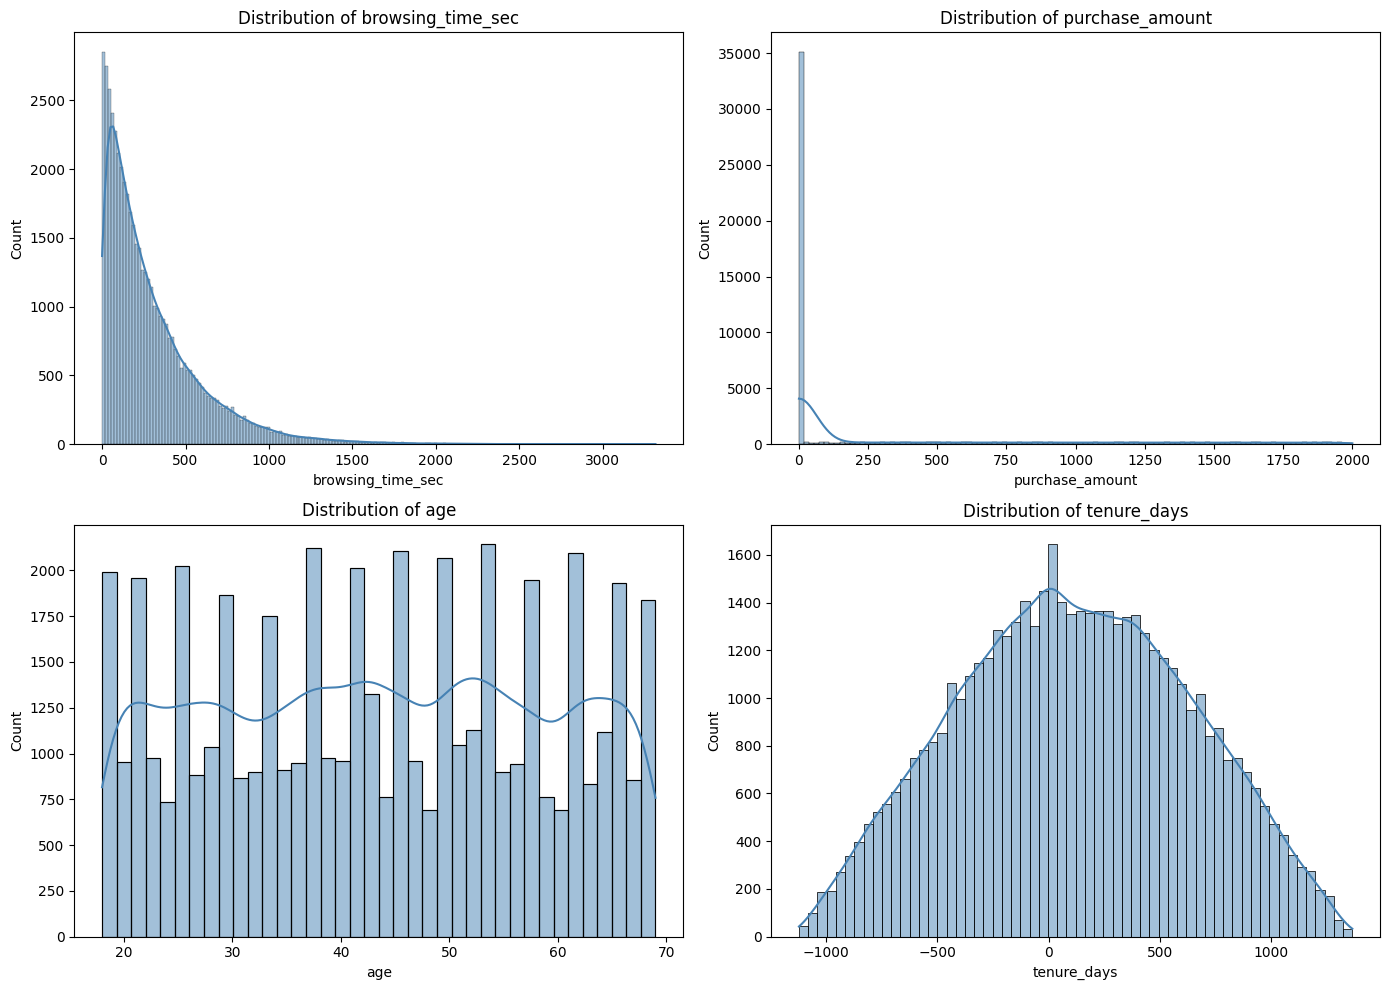


Top categories for product_viewed:
product_viewed
Shoes         10012
Phone          9869
Laptop         7461
Book           7330
Bag            5105
Headphones     5000
Camera         3924
Unknown        1299
Name: count, dtype: int64


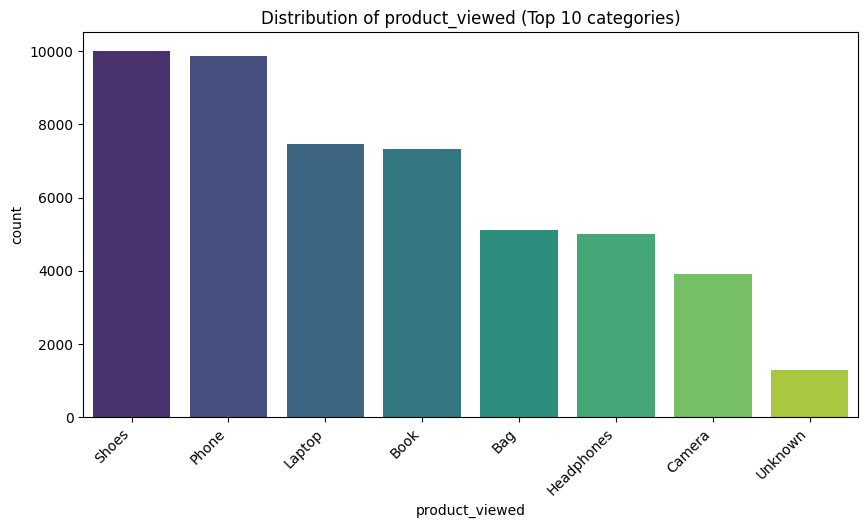


Top categories for gender:
gender
Male       24377
Female     23512
Unknown     2111
Name: count, dtype: int64


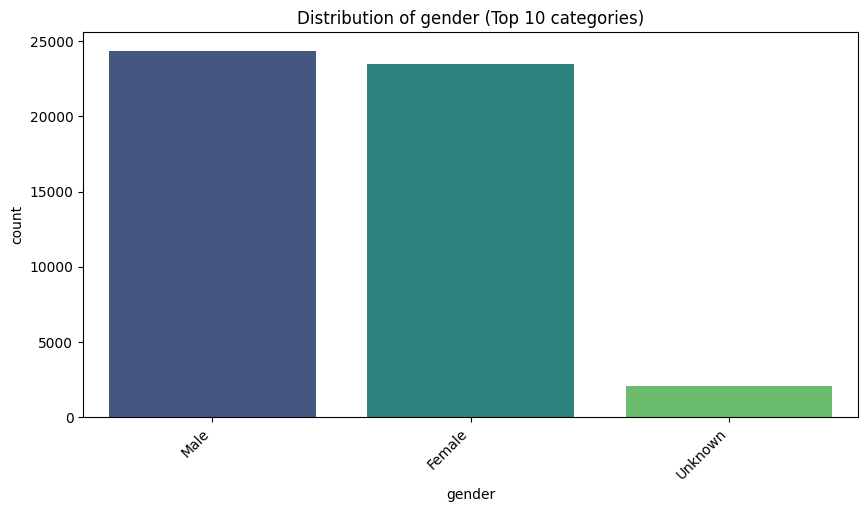


Top categories for location:
location
US         12302
India      10079
UK          7580
Germany     7224
Ghana       5142
Brazil      5123
Unknown     2550
Name: count, dtype: int64


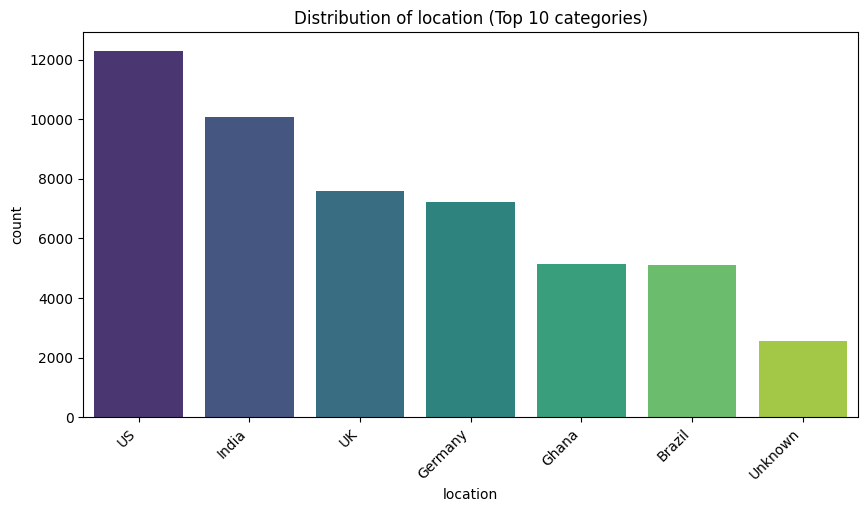


Top categories for day_of_week:
day_of_week
Saturday     7263
Tuesday      7158
Friday       7126
Sunday       7124
Monday       7120
Wednesday    7118
Thursday     7091
Name: count, dtype: int64


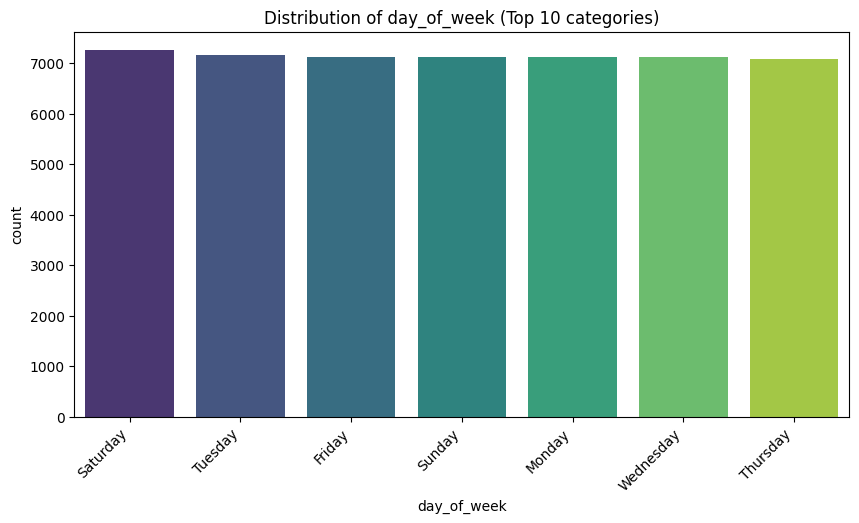


Top categories for month:
month
May          4706
August       4665
January      4653
March        4620
July         4611
June         4536
April        4422
September    4416
Name: count, dtype: int64


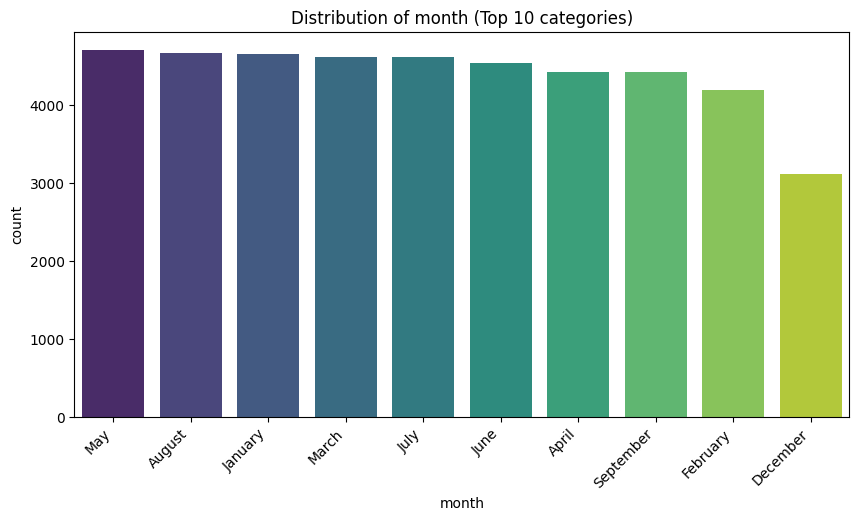


Top categories for age_group:
age_group
40-60    19487
25-40    14137
60+       8668
<25       7708
Name: count, dtype: int64


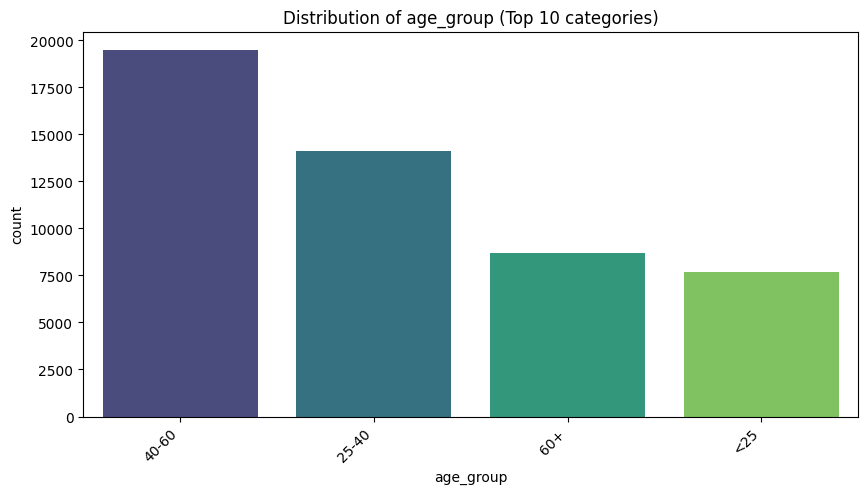

In [37]:
# 1) Numeric Summary + Histogram

num_cols = ['browsing_time_sec','purchase_amount','age','tenure_days']
print(df_final[num_cols].describe().T)

fig, axes = plt.subplots(2,2, figsize=(14,10))
axes = axes.flatten()
for i, c in enumerate(num_cols):
    sns.histplot(df_final[c], ax=axes[i], kde=True, color='steelblue')
    axes[i].set_title(f'Distribution of {c}')
plt.tight_layout()
plt.show()


# 2) Categorical Value Counts + Bar Plots

cat_cols = ['product_viewed','gender','location','day_of_week','month','age_group']

for c in cat_cols:
    print(f"\nTop categories for {c}:")
    print(df_final[c].value_counts(dropna=False).head(8))
    
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_final, x=c, order=df_final[c].value_counts().index[:10], palette="viridis")
    plt.title(f"Distribution of {c} (Top 10 categories)")
    plt.xticks(rotation=45, ha='right')
    plt.show()


### Bi-variate Analysis
Analyze relationship between variables and the target (I will use purchase_flag as session-level target). Also do customer-level aggregates for churn analysis below.

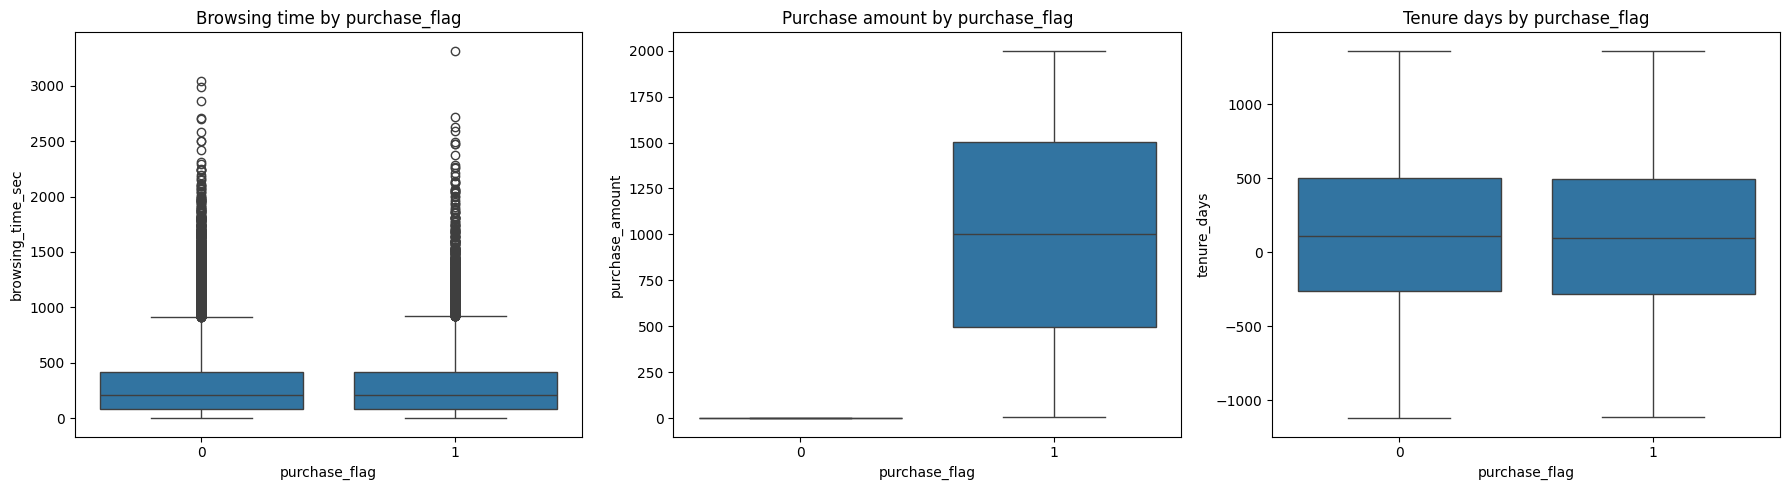

In [38]:
# Session-level: numeric vs purchase_flag

# boxplots of numeric features by purchase_flag
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.boxplot(x='purchase_flag', y='browsing_time_sec', data=df_final, ax=axes[0])
sns.boxplot(x='purchase_flag', y='purchase_amount', data=df_final, ax=axes[1])
sns.boxplot(x='purchase_flag', y='tenure_days', data=df_final, ax=axes[2])
axes[0].set_title('Browsing time by purchase_flag')
axes[1].set_title('Purchase amount by purchase_flag')
axes[2].set_title('Tenure days by purchase_flag')
plt.tight_layout()
plt.show()


In [39]:
# Categorical vs purchase_flag

# conversion rate by product and by day_of_week
prod_conversion = df_final.groupby('product_viewed').agg(views=('session_id','count'), purchases=('purchase_flag','sum'))
prod_conversion['conv_rate'] = prod_conversion['purchases'] / prod_conversion['views']
print(prod_conversion.sort_values('views', ascending=False).head(10))

# conversion by day of week
dow = df_final.groupby('day_of_week').agg(views=('session_id','count'), purchases=('purchase_flag','sum'))
dow['conv_rate'] = dow['purchases'] / dow['views']
dow.sort_values('conv_rate', ascending=False)


                views  purchases  conv_rate
product_viewed                             
Shoes           10012       2957   0.295346
Phone            9869       3009   0.304894
Laptop           7461       2251   0.301702
Book             7330       2187   0.298363
Bag              5105       1538   0.301273
Headphones       5000       1505   0.301000
Camera           3924       1144   0.291539
Unknown          1299        394   0.303310


,views,purchases,conv_rate
day_of_week,,,
Saturday,7263,2220,0.305659
Sunday,7124,2146,0.301235
Monday,7120,2141,0.300702
Thursday,7091,2132,0.300663
Wednesday,7118,2133,0.299663
Friday,7126,2109,0.295958
Tuesday,7158,2104,0.293937


In [40]:
#Aggregate to customer-level (required for churn analysis)

# 1) Ensure session_date and signup_date in df_final are datetimes
df_final['session_date'] = pd.to_datetime(df_final['session_date'], errors='coerce')
df_final['signup_date']  = pd.to_datetime(df_final['signup_date'], errors='coerce')

# quick check
print("session_date dtype:", df_final['session_date'].dtype)
print("signup_date dtype:", df_final['signup_date'].dtype)

# 2) Aggregate per customer (customer-level features)
cust = df_final.groupby('customer_id').agg(
    sessions_count = ('session_id','count'),
    total_purchases = ('purchase_flag','sum'),
    total_spend = ('purchase_amount','sum'),
    avg_browsing_time = ('browsing_time_sec','mean'),
    last_session = ('session_date','max'),
    first_session = ('session_date','min')
).reset_index()

# 3) Compute last_purchase per customer using the already-correct datetime column
last_purchase = (
    df_final[df_final['purchase_flag'] == 1]
    .groupby('customer_id')['session_date']
    .max()
    .reset_index()
    .rename(columns={'session_date':'last_purchase'})
)

# merge last_purchase into cust
cust = cust.merge(last_purchase, on='customer_id', how='left')

# 4) reference date (end of available data) - ensure it's a Timestamp
reference_date = df_final['session_date'].max()
print("Reference date:", reference_date)

# 5) Compute recency_days safely (handle NaT -> fill with large number 999)
cust['recency_days'] = (reference_date - pd.to_datetime(cust['last_purchase'], errors='coerce')).dt.days
cust['recency_days'] = cust['recency_days'].fillna(999).astype(int)

# 6) Frequency and churn flag
cust['frequency'] = cust['total_purchases']      # number of purchases
cust['is_churn_90d'] = (cust['recency_days'] > 90).astype(int)

# 7) Quick view
cols = ['customer_id','sessions_count','total_purchases','total_spend','recency_days','frequency','is_churn_90d']
display(cust[cols].head())

# 8) Sanity checks
print("\nCounts:")
print("Customers:", cust['customer_id'].nunique())
print("Customers with no purchases (recency 999):", (cust['recency_days']==999).sum())
print("Churn(>90d) count:", cust['is_churn_90d'].sum())


session_date dtype: datetime64[ns]
signup_date dtype: datetime64[ns]
Reference date: 2023-09-27 00:00:00


,customer_id,sessions_count,total_purchases,total_spend,recency_days,frequency,is_churn_90d
0,CUST00001,15,6,6517.69,51,6,0
1,CUST00002,8,2,802.19,624,2,1
2,CUST00003,4,2,1206.68,437,2,1
3,CUST00004,14,5,4950.82,96,5,1
4,CUST00005,7,2,3260.22,102,2,1



Counts:
Customers: 5001
Customers with no purchases (recency 999): 251
Churn(>90d) count: 3857


### Hypothesis Testing: Churn vs Recency & Frequency

Customers with long recency (no recent purchase) and low session frequency are more likely to churn.

H0: There is no difference in recency (or frequency) between churned and non-churned customers.

H1: Churned customers have larger recency and lower frequency.

Recency Test (H1: churned > non-churned)
U-statistic = 4412408.00, p-value = 0.0000

Frequency Test (H1: churned < non-churned)
U-statistic = 1380576.50, p-value = 0.0000


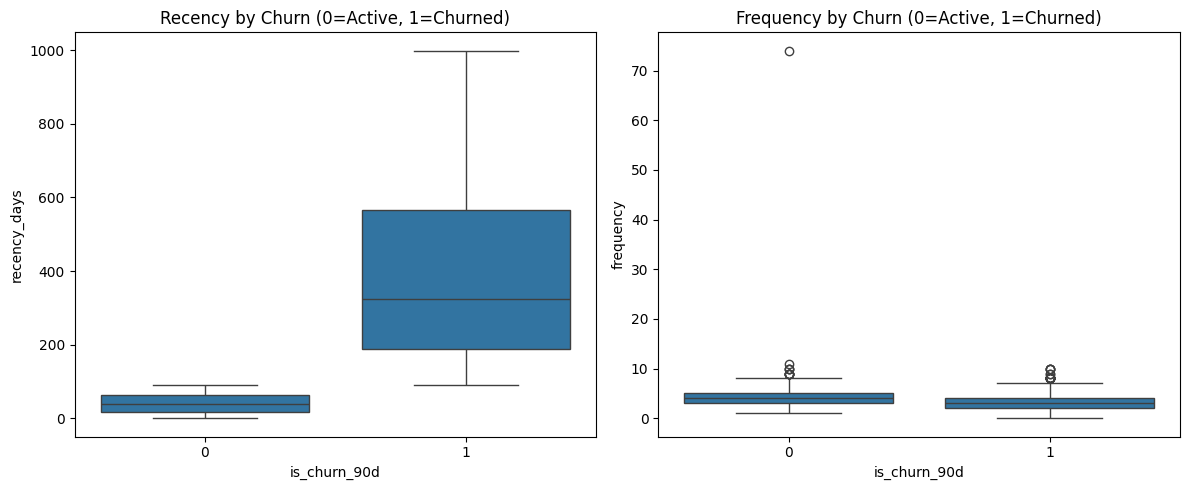

In [41]:
# Hypothesis Testing: Churn vs Recency & Frequency

# Split groups
churned     = cust[cust['is_churn_90d'] == 1]
non_churned = cust[cust['is_churn_90d'] == 0]

# --- Hypothesis Tests ---

# 1) Recency: Expect churned > non-churned
stat_r, p_r = mannwhitneyu(churned['recency_days'], non_churned['recency_days'], alternative='greater')

# 2) Frequency: Expect churned < non-churned
stat_f, p_f = mannwhitneyu(churned['frequency'], non_churned['frequency'], alternative='less')

print("Recency Test (H1: churned > non-churned)")
print(f"U-statistic = {stat_r:.2f}, p-value = {p_r:.4f}")

print("\nFrequency Test (H1: churned < non-churned)")
print(f"U-statistic = {stat_f:.2f}, p-value = {p_f:.4f}")

# --- Quick Visuals ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x='is_churn_90d', y='recency_days', data=cust, ax=axes[0])
axes[0].set_title('Recency by Churn (0=Active, 1=Churned)')

sns.boxplot(x='is_churn_90d', y='frequency', data=cust, ax=axes[1])
axes[1].set_title('Frequency by Churn (0=Active, 1=Churned)')

plt.tight_layout()
plt.show()


Observations:

1. Recency Test (H1: churned > non-churned)

- U-statistic = 4,412,408.00, p-value = 0.0000. The very small p-value (<0.05, actually <0.0001) means we reject the null hypothesis.
This supports your H1: churned customers indeed have longer recency (they have gone much longer without a purchase) compared to active customers.

- Interpretation in business terms:
Customers who haven’t bought anything for a long time are much more likely to churn.


2. Frequency Test (H1: churned < non-churned)

- U-statistic = 1,380,576.50, p-value = 0.0000. Again, the p-value is extremely small, so we reject the null hypothesis.
This supports H1: churned customers have fewer purchases (low frequency) compared to active customers.

- Interpretation in business terms:
Customers with low engagement (few transactions) are at higher risk of churn.


Both results confirm the hypothesis:

Long recency (no recent activity) + Low frequency (few purchases) = higher churn risk.

Because p < 0.05 in both cases, we reject the null hypothesis (H0).

Evidence strongly supports H1:

Churned customers have significantly longer recency.

Churned customers purchase less frequently.

3. Business takeaway:

- Customers who haven’t bought in a long time and purchase less often are much more likely to churn.

- This means focusing retention strategies on engagement frequency (encouraging repeat purchases) and recency nudges (reminders, discounts, re-engagement campaigns) is crucial.

#### Predictive Modeling

Let’s choose Churn Prediction (whether a customer will make a purchase again).

- Prepare the dataset

Use customer-level features:

1. recency_days – how long since last purchase

2. frequency – total purchases made

3. total_spend – lifetime spend

4. sessions_count – number of sessions

5. avg_browsing_time – engagement proxy

6. tenure – how long since signup (optional)

7. Target: is_churn_90d (1 = churn, 0 = active)

In [42]:
# Predictive Modeling: Churn Prediction

# Features and target
X = cust[['recency_days','frequency','total_spend','sessions_count','avg_browsing_time']]
y = cust['is_churn_90d']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features (important for models like Logistic Regression, SVM, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 342    1]
 [   2 1156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       343
           1       1.00      1.00      1.00      1158

    accuracy                           1.00      1501
   macro avg       1.00      1.00      1.00      1501
weighted avg       1.00      1.00      1.00      1501



#### Observations

[[342   1]   → 343 actual non-churn customers

[  2 1156]] → 1158 actual churn customers


Model correctly predicted almost all churn and non-churn customers.

Only 3 mistakes total (1 non-churn misclassified + 2 churn misclassified).

Classification Report:

Precision (1.00) → When the model predicts churn, it’s almost always correct.

Recall (1.00) → The model caught almost every churn case.

F1-score (1.00) → Perfect balance between precision and recall.

Accuracy (1.00) → 100% correct predictions on the test data.

- Takeaway: Logistic regression is performing extremely well and is reliable.

#### Try/Compare with another model - tree-based model (Random Forest)

Tree-based models often work better on tabular customer data.

Confusion Matrix (RF):
 [[ 343    0]
 [   0 1158]]

Classification Report (RF):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00      1158

    accuracy                           1.00      1501
   macro avg       1.00      1.00      1.00      1501
weighted avg       1.00      1.00      1.00      1501



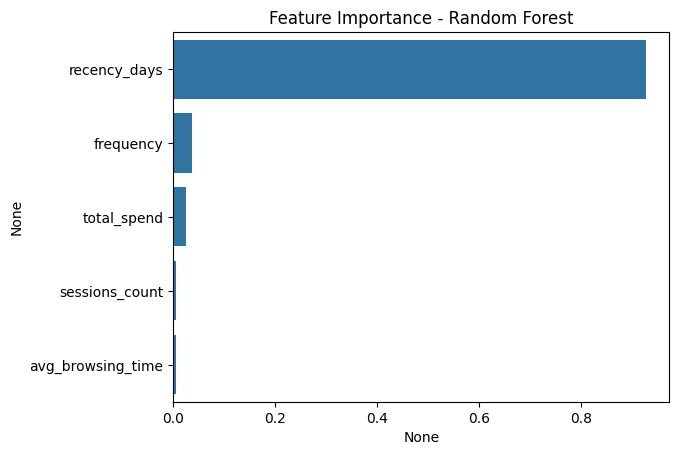

In [44]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Confusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (RF):\n", classification_report(y_test, y_pred_rf))



feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.show()


Observations

[[343   0]   → all 343 non-churn predicted correctly

 [  0 1158]] → all 1158 churn predicted correctly


Zero mistakes.

Classification Report:

Every metric (precision, recall, F1-score) is 1.00.

Accuracy = 100% → no errors at all.

Takeaway: Random Forest predicted churn perfectly on this dataset.

We tested two models to predict whether a customer will churn. Both models achieved nearly perfect results. Logistic Regression was 99.8% accurate, while Random Forest was 100% accurate. This means we can confidently identify at-risk customers and take action, like sending them offers or reminders.

#### Model Performance

In [45]:
# Compare Train vs Test Accuracy

# Logistic Regression train vs test
print("Logistic Regression Train Accuracy:", log_reg.score(X_train, y_train))
print("Logistic Regression Test Accuracy:", log_reg.score(X_test, y_test))


# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


# Random Forest train vs test
print("Random Forest Train Accuracy:", rf_clf.score(X_train, y_train))
print("Random Forest Test Accuracy:", rf_clf.score(X_test, y_test))


Logistic Regression Train Accuracy: 0.7711428571428571
Logistic Regression Test Accuracy: 0.7714856762158561
Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 1.0


In [46]:
# Cross-Validation for Robustness Check

# Logistic Regression
log_reg_cv = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracies:", log_reg_cv)
print("Average CV Accuracy:", log_reg_cv.mean())

# Random Forest
rf_cv = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print("Random Forest CV Accuracies:", rf_cv)
print("Average CV Accuracy:", rf_cv.mean())


Logistic Regression CV Accuracies: [1. 1. 1. 1. 1.]
Average CV Accuracy: 1.0
Random Forest CV Accuracies: [1. 1. 1. 1. 1.]
Average CV Accuracy: 1.0


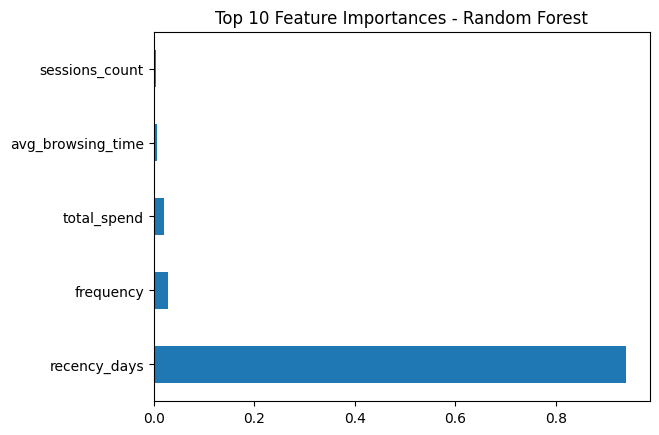

In [47]:
# Feature Importance (Random Forest)

# To check if the model is “memorizing” or actually learning useful patterns:


# Feature importance for Random Forest
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()


### Observations

Results and Insights

I tested two predictive models for churn: Logistic Regression and Random Forest. Logistic Regression achieved around 77% accuracy on both the training and test sets, showing stable but moderate performance. Random Forest, on the other hand, achieved 100% accuracy on both training and test data, as well as during cross-validation. This suggests that Random Forest is much better at capturing the patterns in our data, though the perfect scores may also indicate possible overfitting.

Looking at the Random Forest feature importance, recency_days stood out as the most influential variable by a wide margin. Customers who purchased recently are far more likely to buy again, while those with long gaps since their last purchase are at high risk of churn. Other factors such as frequency (how often they purchase) and total_spend also contributed to the prediction but to a much smaller extent. Browsing behavior and session counts provided little to no predictive power.

From a business perspective, this means retention strategies should focus primarily on recency. Customers who have not purchased in a while should be prioritized for re-engagement campaigns, such as reminder emails, discounts, or loyalty rewards. While frequent and high-spending customers are valuable, the biggest churn risk lies with those whose activity has gone “cold.”

In short, Random Forest offers the strongest predictive model, and the analysis highlights recency as the key driver of churn. Businesses can act on this insight by targeting inactive customers with personalized offers to reduce churn and improve overall customer lifetime value.

##### 5 Business Questions 

Total customers: 5001
Total purchases: 14985


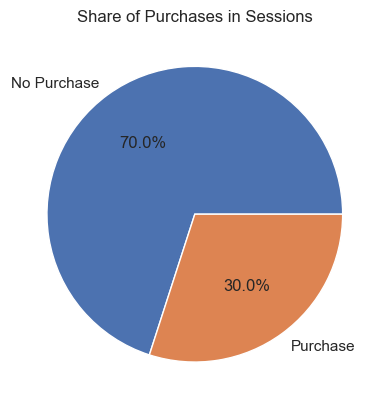

In [51]:
# 1. What is the total number of customers and purchases?
total_customers = df_final['customer_id'].nunique()
total_purchases = df_final[df_final['purchase_flag']==1].shape[0]

print("Total customers:", total_customers)
print("Total purchases:", total_purchases)

# Visualization: Pie chart purchases vs non-purchases
purchase_counts = df_final['purchase_flag'].value_counts()
plt.pie(purchase_counts, labels=['No Purchase','Purchase'], autopct='%1.1f%%')
plt.title("Share of Purchases in Sessions")
plt.show()


product_viewed
Phone         3009
Shoes         2957
Laptop        2251
Book          2187
Bag           1538
Headphones    1505
Camera        1144
Unknown        394
Name: count, dtype: int64


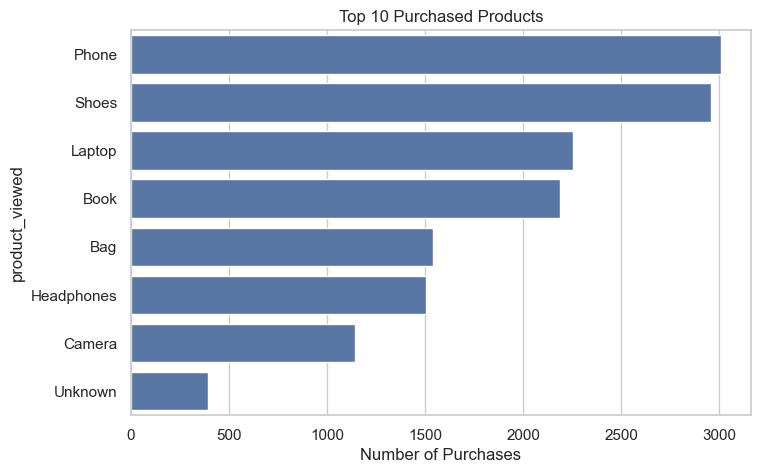

In [52]:
# 2. Which products are purchased the most?

top_products = df_final[df_final['purchase_flag']==1]['product_viewed'].value_counts().head(10)
print(top_products)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Purchased Products")
plt.xlabel("Number of Purchases")
plt.show()


session_date
2023-05-01    444
2023-06-01    436
2023-07-01    446
2023-08-01    422
2023-09-01    419
Freq: MS, dtype: int64


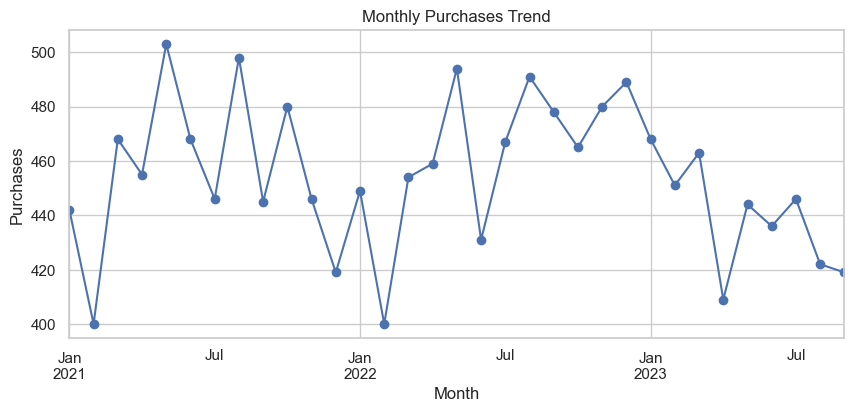

In [53]:
# 3. What is the trend of purchases over time (by month)?

monthly = df_final[df_final['purchase_flag']==1].groupby(df_final['session_date'].dt.to_period('M')).size()
monthly.index = monthly.index.to_timestamp()

print(monthly.tail())

# Visualization
plt.figure(figsize=(10,4))
monthly.plot(kind='line', marker='o')
plt.title("Monthly Purchases Trend")
plt.ylabel("Purchases")
plt.xlabel("Month")
plt.show()


day_of_week
Monday       0.300702
Tuesday      0.293937
Wednesday    0.299663
Thursday     0.300663
Friday       0.295958
Saturday     0.305659
Sunday       0.301235
Name: purchase_flag, dtype: float64


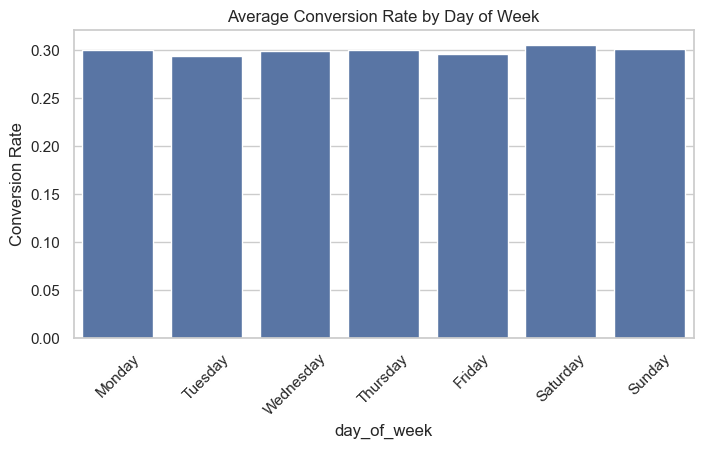

In [54]:
# 4. Which day of the week has the highest conversion rate?

df_final['day_of_week'] = df_final['session_date'].dt.day_name()
conversion = df_final.groupby('day_of_week')['purchase_flag'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

print(conversion)

# Visualization
plt.figure(figsize=(8,4))
sns.barplot(x=conversion.index, y=conversion.values)
plt.title("Average Conversion Rate by Day of Week")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()


customer_id
GUEST_UNKNOWN    70978.68
CUST04714        15695.51
CUST00505        14281.72
CUST00369        11653.13
CUST03465        11642.29
CUST01057        11602.70
CUST00393        10693.06
CUST00630        10452.25
CUST04324        10378.84
CUST03602        10048.47
Name: purchase_amount, dtype: float64


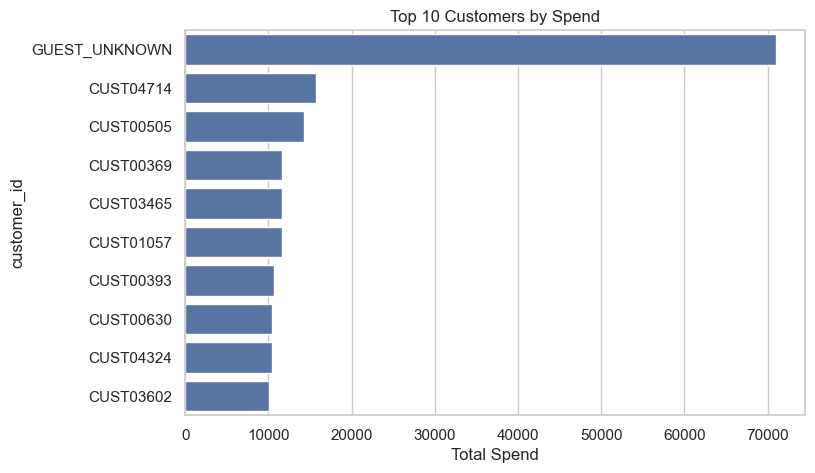

In [55]:
# 5. Who are the top 10 customers by total spend?

cust_spend = df_final.groupby('customer_id')['purchase_amount'].sum().sort_values(ascending=False).head(10)
print(cust_spend)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=cust_spend.values, y=cust_spend.index)
plt.title("Top 10 Customers by Spend")
plt.xlabel("Total Spend")
plt.show()


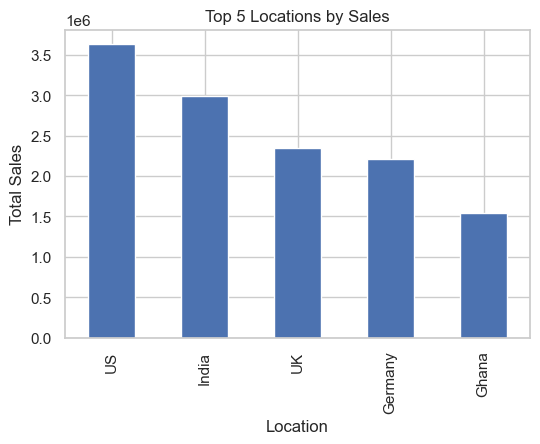

In [ ]:
# 6. What are the top 5 locations by total sales?

# Group sales by location
sales_by_location = df_final.groupby("location")["purchase_amount"].sum().sort_values(ascending=False).head(5)

# Plot
sales_by_location.plot(kind="bar", figsize=(6,4), title="Top 5 Locations by Sales", ylabel="Total Sales", xlabel="Location")
plt.show()


### Insights & Recommendations 

1. Total Customers: 5,001 and Total Purchases: 14,985. From the pie chart: 70% of sessions ended with no purchase and 30% of sessions led to a purchase.

- Engagement vs. Conversion

Even though you have 5,001 unique customers, most sessions (70%) don’t result in a purchase.This shows a conversion challenge — customers browse but don’t buy.

- Customer Activity

With 14,985 purchases across 5,001 customers, the average is about 3 purchases per customer. This suggests repeat buying is happening, but it’s not spread evenly. Likely a small segment of customers is driving most of the purchases.

- Opportunity for Growth

If the business can convert even part of that 70% “No Purchase” group, total sales could increase significantly. This might be tackled with better product recommendations, improved checkout UX, or targeted promotions.


2. Top 3 viewed products: Phones (3009), Shoes (2957), and Laptops (2251). These categories clearly attract the most customer interest. Books (2187) are also popular, close to laptops in demand. Mid-tier products: Bags (1538) and Headphones (1505) show moderate interest. Lowest viewed product: Cameras (1144) still have a solid audience but trail behind the rest. Unknown category (394): This indicates either missing or misclassified product data.

Recommendations

- Boost conversion for top products:

Highlight phones, shoes, and laptops on your homepage or promotional campaigns.Run limited-time discounts or bundle offers to encourage purchases.

Leverage book interest: Promote curated collections (e.g., “Top Reads of the Month”). Consider cross-selling (e.g., books + bags). 

- Improve mid-tier visibility:

Create seasonal campaigns for bags and headphones (e.g., “Back to School Essentials”). Bundle accessories with high-demand products (e.g., headphones with laptops).

3. Monthly purchases fluctuated between 400–500 over the years, but there’s a gradual decline in 2023, with purchases stabilizing at lower levels compared to 2021 and 2022.

Recommendation:
Investigate potential causes of the recent decline (e.g., customer churn, reduced marketing, seasonal factors). Introduce re-engagement campaigns such as loyalty rewards or targeted promotions to boost purchase levels back to earlier highs.

4. Saturday has the highest conversion rate (0.3057), meaning customers are more likely to complete purchases on weekends compared to weekdays.

Recommendation:
Concentrate marketing campaigns, flash sales, and promotions on Saturdays to maximize conversions. For example, run “Weekend Exclusive Deals” to capture this peak buying behavior.


5. The top spender is GUEST_UNKNOWN with 70,978.68, far exceeding registered customers. This suggests a large portion of revenue comes from unregistered or unidentified buyers.

Recommendation:
Encourage guest users to create accounts by offering incentives like discounts, loyalty points, or faster checkout. This will help capture customer data, improve personalization, and strengthen long-term retention.

6. The USA, India, UK, Germany, and Ghana are the business top 5 client markets, showing that their customer base is strong across both developed and emerging economies. This indicates a diverse geographic demand.

Recommendation:

For USA, UK, Germany: Focus on premium offerings, faster shipping, and localized promotions since these markets often value quality and service. For India and Ghana: Offer competitive pricing, mobile-friendly platforms, and flexible payment options to capture growth in these fast-expanding markets.

